In [78]:
import numpy as np
import matplotlib.pyplot as plt

dx = 0.02
dt = 0.005

x = np.arange(0, 1+dx, dx)
t = np.arange(0, 1+dt, dt)

gamma = dt/dx**2

f = np.sin(np.pi*x)

# prepare diagonals
off_diag = np.empty(len(x)-3)   # prepare off diagonal of the system matrix
main_diag = np.empty(len(x)-2)  # prepare main diagonal of the system matrix

# fill diagonals
off_diag.fill(-gamma)
main_diag.fill(1+2*gamma)

# assemble system matrix
A = np.diag(off_diag, -1) + np.diag(off_diag, 1) + np.diag(main_diag, 0)

In [79]:
def solveSystem(f):
    res = np.linalg.solve(A, f[1:-1])
    res = np.pad(res, (1,1))
    return res

u = np.array(f)
for j in t:
    f = solveSystem(f)
    u = np.vstack([u, f])

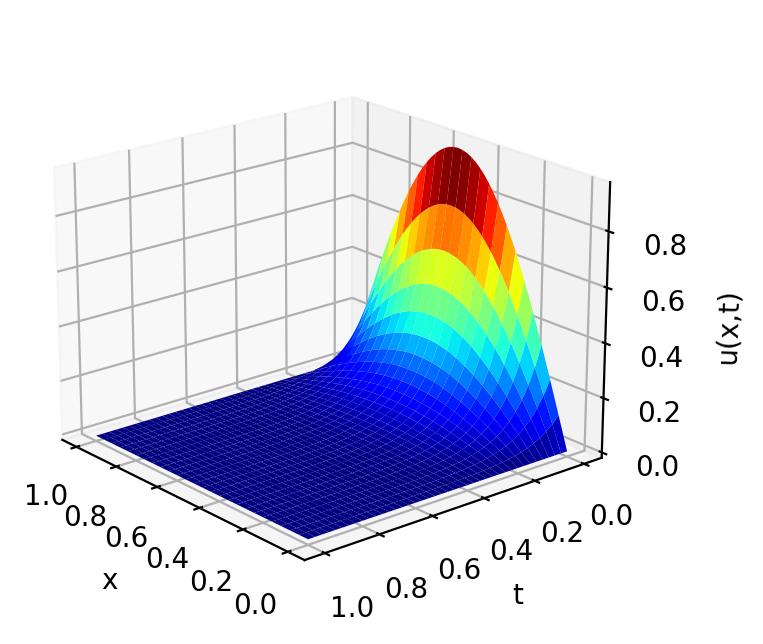

In [80]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D figure
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')

# Plot the solution as a 3D surface
X, Y = np.meshgrid(x, t)
ax.plot_surface(X, Y, u[1:, :], cmap='jet')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')

# Change perspective
ax.view_init(20, 140)

plt.show()

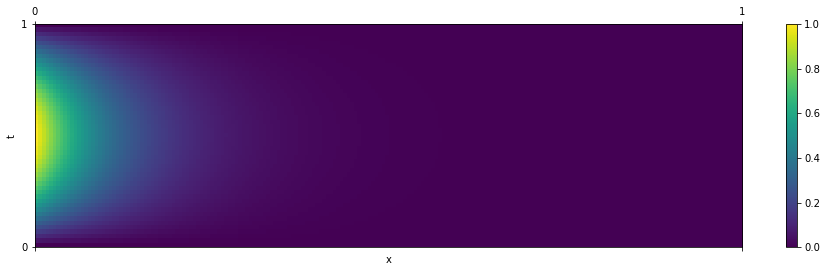

In [81]:
u_rot = np.rot90(u)
plt.matshow(u_rot, extent=[0, 1, 0, 1], origin='lower', aspect='auto')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()
plt.show()